<a href="https://colab.research.google.com/github/Pranav8838/intern-task/blob/main/intern_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ============================
# House Price Prediction (Linear Regression)
# ============================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2. Load Dataset (after uploading house_prices.csv)
df = pd.read_csv("house_prices.csv")

print("Shape:", df.shape)
df.head()




Shape: (10, 7)


,LotArea,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,SalePrice
0,8450,7,2003,856,1710,2,208500
1,9600,6,1976,1262,1262,2,181500
2,11250,7,2001,920,1786,2,223500
3,9550,7,1915,756,1717,3,140000
4,14260,8,2000,1145,2198,3,250000


In [ ]:
# Calculate VIF to detect multicollinearity
X = df.drop("SalePrice", axis=1)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data


,Feature,VIF
0,LotArea,94.531026
1,OverallQual,1678.101412
2,YearBuilt,205.455978
3,TotalBsmtSF,77.069416
4,GrLivArea,599.089252
5,GarageCars,83.931289


In [ ]:
# Features and Target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 32326.049409383908
Root Mean Squared Error (RMSE): 35425.31417103705


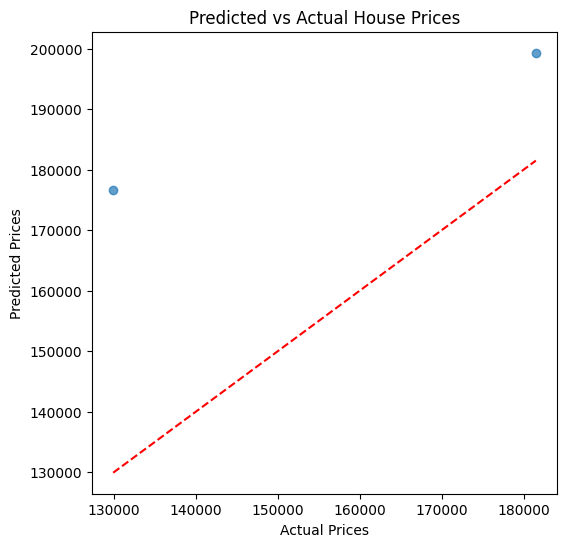

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # line y=x
plt.show()
